# Graphical Modeling
# Hierarchical Modeling
# Probablistic Modeling
# (Bayesian or Otherwise)
# For Machine Learning

In [74]:
import pandas as pd
import pystan
import matplotlib.pyplot as plt

# Introduction

When we say machine learning we might think of a set:

`
{
    (x1, y1),
    (x2, y2),
    .        
    .        
    .        
    (xn, yn) 
}
`
We might try to:
1. Learn a mapping function `y = f(x)` to predict `y` for new values of `x`
2. Model `(x, y)` together to generate new values for `(x, y)`
3. Run regression models or classification models to determine which of `x`'s dimentions has impact on `y`. This is not just for prediction but for making some informed conclusions. This might involve hypothesis testing.
4. `x, y` can have multiple dimentions and can be continuous or discrete. This will determine whether we are doing regression or classification.

# Learning (fitting)

* In all the cases above we usually need to fit a model

Two steps:
1. Define a model: A set of possible functions which predict or generate your data, parameterised by some `theta`
2. Define a loss function: A function of `theta` (and your data) which you need to optimise (minimise) with respect to `theta` to end up with the best possible model.

# Probablity and Machine Learning

* Now what does probability have to do with machine learning?
* Or, when does a model become probablistic?

Answer: When the model is a probability distribution (or a set of parameterised ones). In other words, when we treat our unknowns (and sometimes the observed) as random variables.


* For example, find the most likely distribution which generated the data we observed.
* Or, find the most likely conditional distribution which would generate `y` given `x`.

# Probabilty Distributions

* A function which maps an outcome to a number between 0 and 1 which represents its probability of occurance. 
* Outcomes can be represented by discrete or continuous numbers.
* `theta = 0.325636` is an outcome, `y = 1` is an outcome.

# Some Rules

* Probability distributions can be univariate or multivariate.
    * Univariate: The probability `P(theta = 0.43)`
    * Multivariate: The probability `P(theta = 0.43 & y = 1)`
* `P(x,y,theta)` is one way to refer to the joint probability over your data and parameters.
* `P(x,y,theta) = P(x,y|theta) * P(theta)` you often see this in literature. This is the chain rule. if you do the chain rule one the left by reversing `x, y` and `theta` you get Bayes theorem.
* Chain rule taken for granted and hence Bayes.

# Intuitions

* `P(x,y,theta)` refers to all possible distrbutions (infinit possibilities).
* Imagine if you had 1 probability and you had to split it between all combinations of `x,y,theta` assignments.
* In probablistic machine learning usually we ask one of these questions:
    * Which is the `theta` which most likely generated the data `x, y`? (more frequentist)
    * Which is the `theta` which given the `x` part of the data, generated the `y` part of the data? (also frequentist)
    * What do I know about `theta` before and after seeing the data? (more Bayesian)

# How to Represent `P(x,y,theta)`?

* Infinite possibilities of distributions and parameterisations
* We have to simplify it

# Back to the basics `P(x,y,z)`

* Using the chain rule: `P(x,y,z) = P(x|y,z) * P(y,z) = P(x|y,z) * P(y|z) * P(z)`
* We can see that the set of all possible, multivariate distributions factorises to simpler parameterised (conditional) univariate distributions
* Still the collective complexity has not changed

# Graphical Modeling

* Represent distribution with a set of conditional dependancies from the chain rule
* Reduce the complexity by assuming conditional independance relations
* These assumptions of conditional independance are usually informed

`P(x,y,z) = P(x|y,z) * P(y,z) = P(x|y,z) * P(y|z) * P(z)` becomes:
* what if I change it to this: `P(x|y) * P(y|z) * P(z)`
* Or this: `P(x|z) * P(y|z) * P(z)`
* we reduce complexity and the set of possible distributions, maybe if we represent it as a graph
* Let's represent every sufficient conditional dependancy as an edge, and every random variable as a node
* Usually dark nodes are observed and light nodes are random variables (generated or sampled)

In [6]:
import networkx as nx
G = nx.DiGraph()

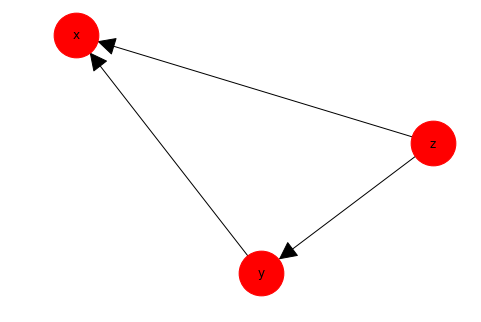

In [27]:
G.clear()
G.add_nodes_from(['x', 'y', 'z'])
G.add_edges_from([('z', 'y'), ('z', 'x'), ('y', 'x')])
nx.draw(G, with_labels=True, node_size=2000, arrowsize=40)

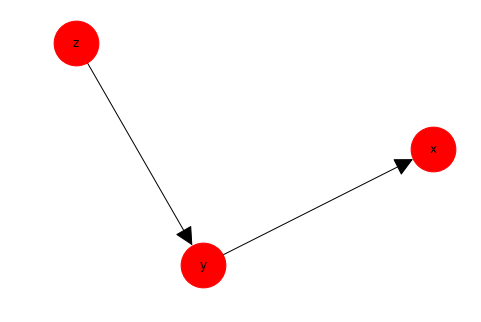

In [28]:
G.clear()
G.add_nodes_from(['x', 'y', 'z'])
G.add_edges_from([('z', 'y'), ('y', 'x')])
nx.draw(G, with_labels=True, node_size=2000, arrowsize=40)

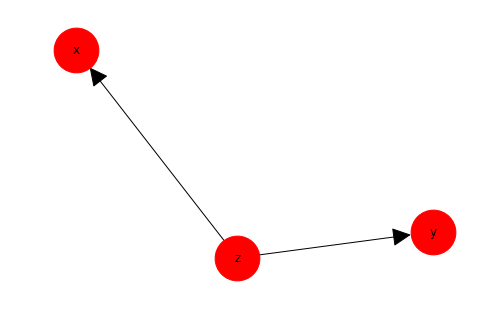

In [32]:
G.clear()
G.add_nodes_from(['x', 'y', 'z'])
G.add_edges_from([('z', 'y'), ('z', 'x')])
nx.draw(G, with_labels=True, node_size=2000, arrowsize=40)

# More Real Examples of Directed Asyclic Graphical Models

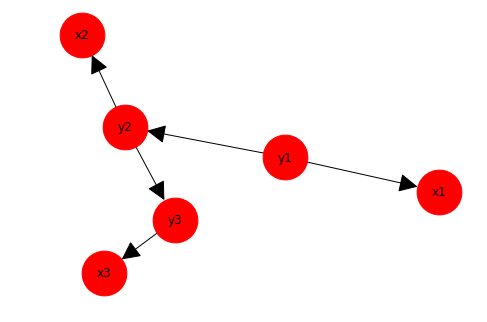

In [70]:
G.clear()
G.add_nodes_from(['x1', 'x2', 'x3', 'y1', 'y2', 'y3'])
G.add_edges_from([('y1', 'y2'), ('y2', 'y3'), ('y1', 'x1'), ('y2', 'x2'), ('y3', 'x3')])
nx.draw(G, with_labels=True, node_size=2000, arrowsize=40)

# Other Types of Graphs

* We presented Directed Acyclic Graphs (DAGs)
* There are other types of graphical models:
    * Undirected Graphs (UGs): Parameterise by a splitting the random variables into subsets and giving each subset (clique) a parameterised joint distribution
    * Factor Graphs (FGs): Like UGs, they represent the joint distribution with the product of many subjoint distributions but with different visual and mathematical representation
* We will focus on DAGs
* All 3 types of graphs are able to model all types of distributions. They just have different parameterisations and usually different learning loss functions and algorithms
* There are different laws of conditional independence for each type of graph

# Conditional Independence (or just independance given what we know which is always the case)

* Two nodes are said to be conditionally independent if:
    * They are completely lie in disjoint parts of the graph.
    * They are D separated.

# Do not Confuse with Generative and Discriminative models

* Discriminitive and Generetive models are not analogies of UGs and DAGs!
* UGs and DAGS are different parameterisations and they differ in which probability distributions they can model.
* UGs are harder to learn due to the normalisation parameter which depends on x Z(x).
* Markov Random Fields MRF is another name for UGs and they define a general set of models.
* For examples, conditional random fields are MRFs trained on the conditional Likelihood.

# Also, do not confuse baysian and non-baysian with discriminative and generative models
* Often there is a distinction between Generative and Discriminative "Learning" and "Models"
* We can choose one of the two as a consistant way to describe the difference between models.
* But generally, models are often associated with training procedures which are described as both Generative or Discriminative. For example CRFs are discriminative and they are discriminatively trained. Although CRFs are not necessarily discriminative.
* It is important to note that discriminative training is not bayesian within the specified model but within the imaginary "different model".
* Since all our examples are bayesian, we will only train generatively. But if the model has an independent X generation process then this would be equivalent to some discriminative training.

* Ng shows how generative models reach their higher assimtotic error faster.
* Bishop (<a href="https://www.microsoft.com/en-us/research/wp-content/uploads/2016/05/Bishop-Valencia-07.pdf">Generative or Discriminative? Getting the Best of Both Worlds</a>) shows how discriminative training is basically generative training of a different model. This different model assumes and independent process for generating the Xs.

# Back to Fitting

1. Maximum Likelihood (frequentist)
    * Find the max of L(theta) = Product(P(xi,yi|theta))
2. MAP (more Bayesian)
    * Find the max of P(theta\`) = P(theta|xi,yi for all i) * P(theta)
3. Monte Carlo (more Bayesian)
    * Sample from the posterior of theta give the data P(theta\`)
    
NOTEs:
* MLE is a special case of MAP where P(theta) is uninformative Uniform. P(theta) = 1
* There are other distributions we can find given the data like the prior predictive distribution and the posterior predictive distribution

# Other Things to Do with a Graphical Model

* Prior Predictive Distribution P(x`,y`|theta) (predict more data before gathering data)
* Posterior Predictive distribution P(x`,y`|x,y,theta) (predict more data after gathering data)

# Some Notes

* The arrows in a DAG can sometimes be completely deterministic operations.
* Basically, each node is deterimined by ALL the incoming arrows by:
    * Parameterising a probability distribution
    * Input to a deterministic formula
* Deterministic Operations are usually represented with different style of edges.
* Plate Notation: When there are parts of the graph which repeat many times, the plate notation helps confine the graphical model's visualisation size.

# Summary

* A DAG represents a set of probability distributions.
* Give a data set we are looking for the one which most likely generated the data (or to that effect).

# Practical

# Rib Fracture (Logistic Regression)

In [75]:
rsf = pd.read_csv('ribstressfractures.csv')

In [76]:
# Other types of imputations could be done here
rsf = rsf.dropna()

In [77]:
model = """
data {
    int N;
    real age[N];
    real fat[N];
    real hip[N];
    real spine[N];
    real rib[N];
    int weight[N];
    int sweep[N];
    int ageg[N];
    int gender[N];
    int res[N];
}
parameters {
    real a[10];
}
model {
    for (i in 1:N) {
        res[i] ~ bernoulli_logit(a[1] * age[i]    + a[2] * fat[i]   + a[3] * hip[i] +
                                 a[4] * spine[i]  + a[5] * rib[i]   + a[6] * weight[i] +
                                 a[7] * sweep[i]  + a[8] * ageg[i]  + a[9] * gender[i] +
                                 a[10]);
    }
    
    for (i in 1:10) {
        a[i] ~ normal(0, 20);
    }
}
"""

struct_data = {
    'N': len(rsf),
    'age': rsf['Age'].values,
    'fat': rsf['BodyFat'].values,
    'hip': rsf['HipBMD'].values,
    'spine': rsf['SpineBMD'].values,
    'gender': rsf['FemaleMale'].values,
    'rib': rsf['RibBMD'].values,
    'weight': rsf['HeavyLight'].values,
    'sweep': rsf['SweepScull'].values,
    'ageg': rsf['AgeGp'].values,
    'res': rsf['BinResp'].values
}

In [78]:
sm = pystan.StanModel(model_code=model)
fit = sm.sampling(data=struct_data, iter=1000, chains=2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e3b0b2f47318bf0ab7e3b44a0ca763b6 NOW.


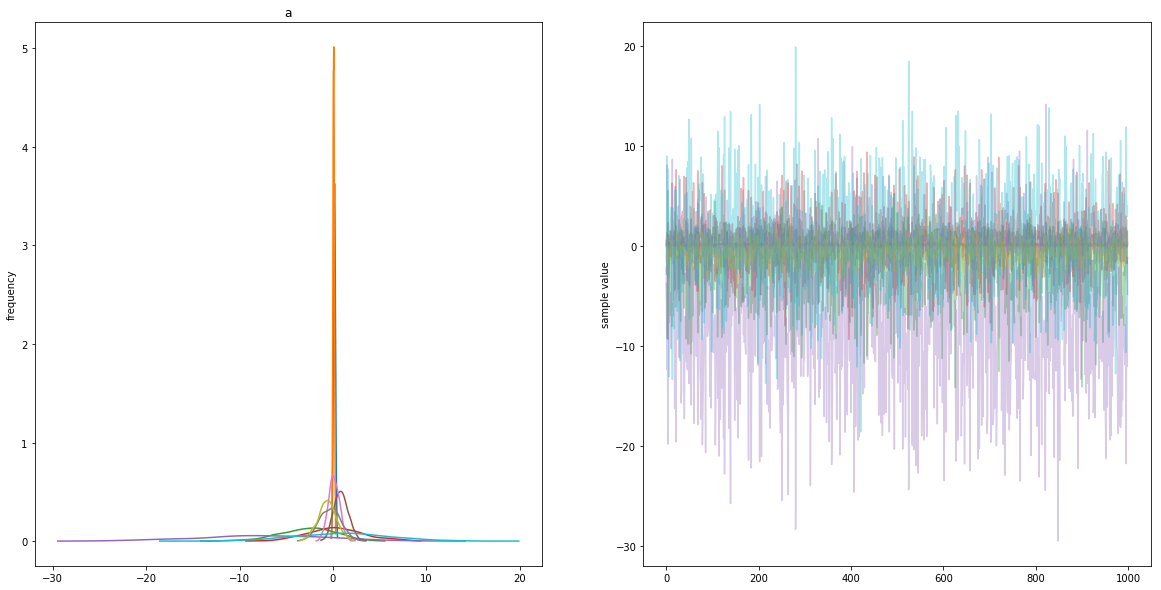

In [79]:
f = fit.plot()
f.set_size_inches(20, 10)

In [80]:
fit

Inference for Stan model: anon_model_e3b0b2f47318bf0ab7e3b44a0ca763b6.
2 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a[0]   0.16  4.6e-3   0.11  -0.05   0.09   0.16   0.24   0.37    542    1.0
a[1]   0.08  3.1e-3   0.08  -0.07   0.03   0.08   0.13   0.22    583    1.0
a[2]  -2.74    0.12   3.02  -9.23   -4.7  -2.47  -0.65   2.66    627    1.0
a[3]   0.35    0.11   3.04  -5.37  -1.64   0.29   2.23   6.94    739    1.0
a[4]  -7.44    0.28   6.97 -21.39  -11.9  -7.51  -2.38   5.49    620    1.0
a[5]   0.88    0.03   0.76  -0.54   0.35   0.86   1.37   2.41    644    1.0
a[6]   0.11    0.02   0.59  -1.09  -0.27   0.09   0.52    1.3    762    1.0
a[7]  -0.31    0.05   1.13  -2.55  -1.13  -0.29   0.46   1.83    618    1.0
a[8]  -0.62    0.04   0.97  -2.51  -1.25   -0.6-7.2e-3    1.3    563    1.0
a[9]    0.9    0.22   5.09  -9.17  -2.42   1.03   4.1

# Player Score Mixture Model

In [81]:
scores = pd.read_csv('labs Como 2018/datasets/eyes.csv', names=['val'])

In [147]:
model = """
data {
    int N;
    real eyes[N];
}
parameters {
    simplex[2] p;
    vector[2] mus;
    real stds[2];
}
model {
    real ps[2];
    
    for (i in 1:N) {
        for (j in 1:2) {
            ps[j] <- log(p[j]) + normal_log(eyes[i], mus[j], stds[j]);
        }
        
        increment_log_prob(log_sum_exp(ps));
    }
    
    for (i in 1:2) {
        mus[i] ~ normal(550, 100);
        stds[i] ~ inv_gamma(1,2);
    }
}
"""

struct_data = {
    'N': len(scores),
    'eyes': scores['val'].values
}

In [148]:
sm = pystan.StanModel(model_code=model)
fit = sm.sampling(data=struct_data, iter=1000, chains=2)

ValueError: Failed to parse Stan model 'anon_model_0e90ea1081bf783b730a971e9e818eb2'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

Base type mismatch in assignment; variable name = idx, type = int; right-hand side type=real
  error in 'unkown file name' at line 15, column 14
  -------------------------------------------------
    13:     for (i in 1:N) {
    14:         p ~ beta(1, 1);
    15:         idx = round(p) + 1;
                     ^
    16:         eyes[i] ~ normal(mus[idx], stds[idx]);
  -------------------------------------------------

PARSER EXPECTED: <expression assignable to left-hand side>


In [138]:
fit

Inference for Stan model: anon_model_02c45253cd37513a573e8d726454c7f0.
2 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p[0]       0.3  5.1e-3   0.09   0.15   0.24    0.3   0.35   0.51    317    1.0
p[1]       0.7  5.1e-3   0.09   0.49   0.65    0.7   0.76   0.85    317    1.0
mus[0]  550.37    0.08    1.0 547.61 550.03 550.55 550.96 551.73    145   1.01
mus[1]  537.83    0.06   1.14 535.58 537.13 537.78 538.55 540.08    319    1.0
stds[0]   2.12    0.07   0.87   1.14   1.55   1.88   2.42   4.59    143   1.02
stds[1]   4.64    0.06   0.96   3.04    4.0   4.57   5.14   6.83    283    1.0
lp__    -162.7    0.17   2.16 -167.9 -163.9 -162.3 -161.0 -159.8    169   1.02

Samples were drawn using NUTS at Wed Jun  6 12:49:26 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor o

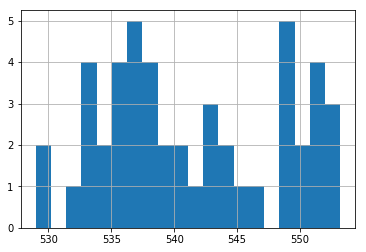

In [142]:
scores['val'].hist(bins=20)
plt.show()

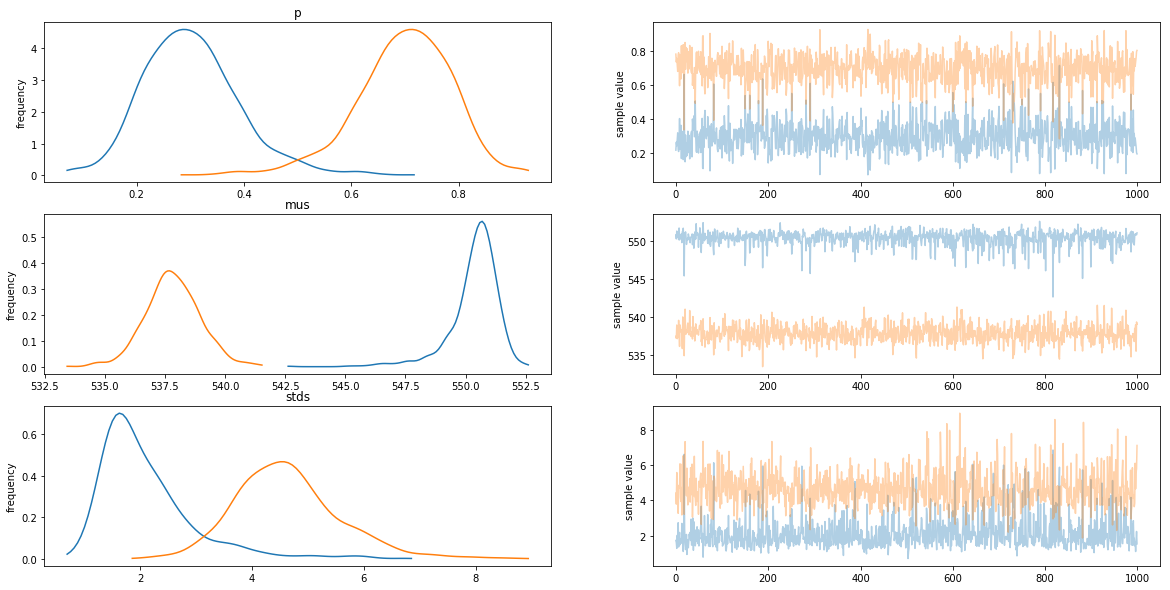

In [139]:
f = fit.plot()
f.set_size_inches(20, 10)

# Best Cricketer of All Time

In [149]:
bats = pd.read_csv('batsmen.csv')

In [150]:
data = {
    'N': len(bats),
    'NP': len(bats['Player'])
}

,Player,Mat,Inns,NO,Avg,decade,var
0,Steve Smith,61,111,16,63.75,2010,1871.924
1,Adam Voges,20,31,7,61.87,2010,1289.462
2,Greg Chappell,87,151,19,53.86,1970,1161.535
3,Ricky Ponting,168,287,29,51.85,2000,1178.337
4,Jack Ryder,20,32,5,51.62,1920,1056.607


In [ ]:
model = """
parameters {
    real yp[N];        # Predict for fun
    real mu[N];        # Each players deviation from decade mean .. mean
    real phi_mu;       # the common mean
    real beta_all[NP]; # The polynomial coefficients
}
data {
    int N;         # Number of players
    int NP;        # Number of polynomial regression dims
    real Y[N];     # The averages
    real V;        # Variance
    int O[N];      # Number of runs
    real X[N, NP]; # Design matrix for polynomial regression
}
model {
    real vec[N, NP];
    real lp[N];
    
    for (i in 1:N) {
        y[i] ~ dnorm(lp[i], O[i] / V[i]);
        yp[i] ~ dnorm(lp[i], O[i] / V[i]);
        
        for (r in 1:NP){
            vec[i, r] <- beta_all[r] * X[i, r];
        }
        
        lp[i] <- sum(vec[i, 1:NP]) + mu[i];
    }
    
    for (i in 1:N){
        mu[i] ~ dnorm(0, phi_mu) ;
    }

    for (r in 1:NP){
        beta_all[r] ~ dnorm(0, 0.001);
    }
    
    phi_mu ~ dunif(0, 100);
}
"""

# Spatial models
* R-INLA

In [153]:
model = """data {
  int<lower = 1> n;
  int<lower = 1> p;
  matrix[n, p] X;
  int<lower = 0> y[n];
  vector[n] log_offset;
  matrix<lower = 0, upper = 1>[n, n] W;
}
transformed data{
  vector[n] zeros;
  matrix<lower = 0>[n, n] D;
  {
    vector[n] W_rowsums;
    for (i in 1:n) {
      W_rowsums[i] = sum(W[i, ]);
    }
    D = diag_matrix(W_rowsums);
  }
  zeros = rep_vector(0, n);
}
parameters {
  vector[p] beta;
  vector[n] phi;
  real<lower = 0> tau;
  real<lower = 0, upper = 1> alpha;
}
model {
  phi ~ multi_normal_prec(zeros, tau * (D - alpha * W));
  beta ~ normal(0, 1);
  tau ~ gamma(2, 2);
  y ~ poisson_log(X * beta + phi + log_offset);
}"""

ModuleNotFoundError: No module named 'pyjags'

## Basketball example

In [ ]:
model = """data {
 int<lower=1> N1; //number of data points
 int x1[N1]; //number of outcomes
 int n1[N1]; // number of observations
 int<lower=1> N2; // number of new points
 matrix[N1+N2,N1+N2] dist; //distances between points
}
transformed data{
 int<lower=1> N;
 N = N1 + N2;
}
parameters{
 vector[N1] y1;
 vector[N2] y2;
 real beta;
 real  sigma_sq;
 real  phi;
}
transformed parameters{
 vector[N1+N2] mu;
 for(i in 1:N) mu[i] = beta;
}
model{
 vector[N] y;
 matrix[N,N] Sigma;
 matrix[N,N] L;
 for(i in 1:N1) y[i] = y1[i];
 for(i in 1:N2) y[N1+i] = y2[i];
 for(i in 1:(N-1)){
   for(j in (i+1):N){
     Sigma[i,j] = exp((-1)*phi*dist[i,j]);
     Sigma[j,i] = Sigma[i,j];
   }
 }
 for(i in 1:N) Sigma[i,i] = sigma_sq;
 L = cholesky_decompose(Sigma);
 sigma_sq ~ normal(0, 5);
 phi ~ normal(0, 5);
 y ~ multi_normal_cholesky(mu,L);
 beta ~ normal(0,5);
 x1 ~ binomial_logit(n1,y1);
}
generated quantities{
 vector[N2] y_pred;
 for(i in 1:N2) y_pred[i] = inv_logit(beta+y2[i]);
}"""